<a href="https://colab.research.google.com/github/kashifalikhan36/Machine_learning_Resources/blob/main/ML_rev_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv("Salary_dataset.csv")

In [6]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


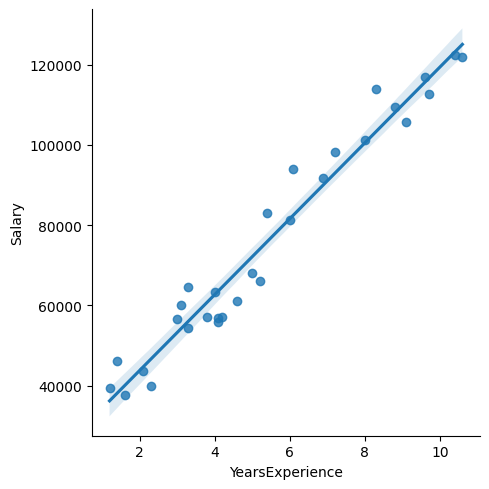

In [20]:
sns.lmplot(x="YearsExperience",y="Salary",data=data)

In [11]:
x=data["YearsExperience"].values.reshape(-1,1)
y=data["Salary"].values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
pred_y_test=model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(r2_score(y_test,pred_y_test))
print(mean_absolute_error(y_test,pred_y_test))
print(mean_squared_error(y_test,pred_y_test))

0.8688045158887867
6055.032971544777
41480478.92326943


In [21]:
data2=pd.read_csv("Ice_cream selling data.csv")

In [22]:
data2.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


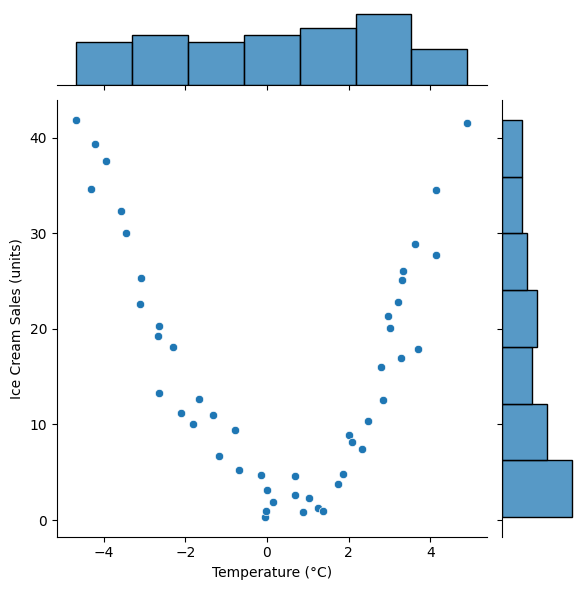

In [25]:
sns.jointplot(x="Temperature (°C)",y="Ice Cream Sales (units)",data=data2)

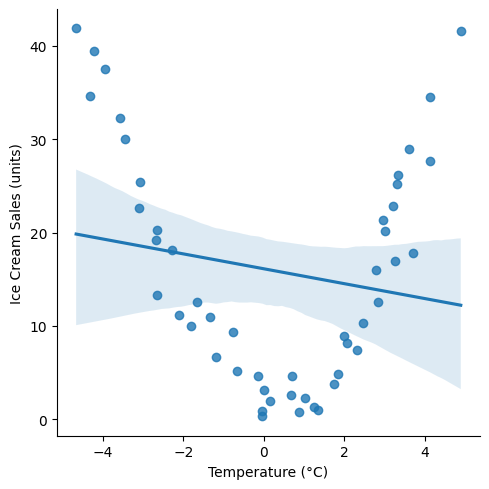

In [26]:
sns.lmplot(x="Temperature (°C)",y="Ice Cream Sales (units)",data=data2)

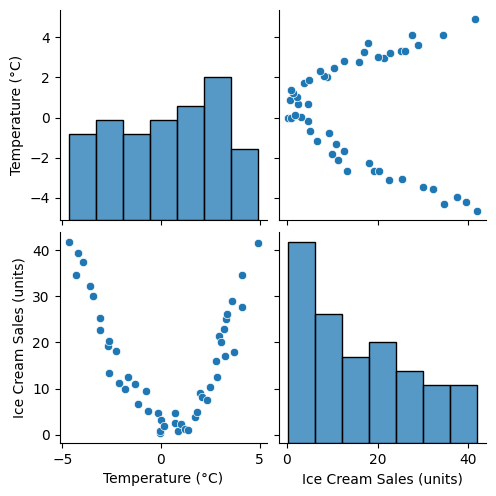

In [27]:
sns.pairplot(data2)

In [28]:
x=data2[["Temperature (°C)"]]
y=data2["Ice Cream Sales (units)"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=43)

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)

In [34]:
model.fit(x,y)

LinearRegression()

In [35]:
y_pred_l=model.predict(x)

In [36]:
print(model.coef_)
print(model.intercept_)

[-0.79645711]
16.121749391993667


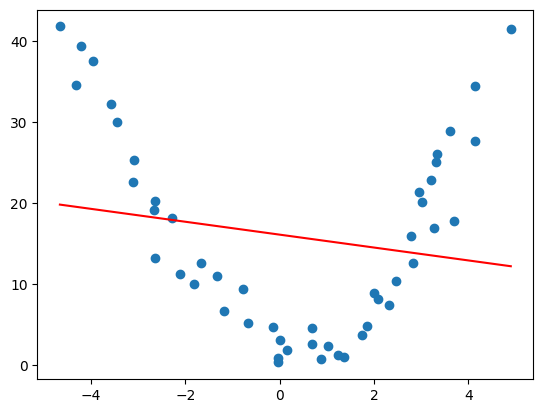

In [39]:
plt.scatter(x,y)
plt.plot(x,y_pred_l,color="red")

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly_reg=PolynomialFeatures(degree=5)

In [60]:
x_poly=poly_reg.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_poly,y,train_size=0.2,random_state=43)

In [62]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)

In [63]:
regressor.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred_poly=regressor.predict(X_test)

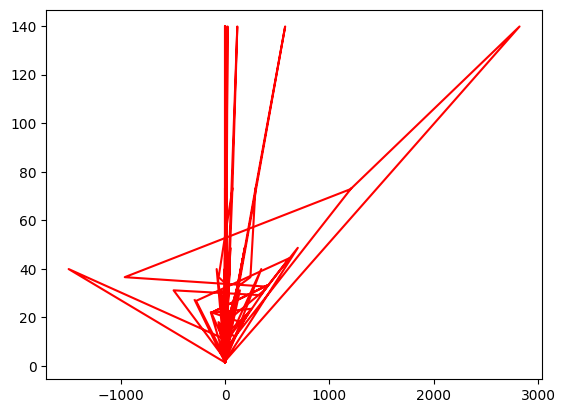

In [65]:
plt.plot(X_test, y_pred_poly, color="red", label="Polynomial Fit")

In [66]:
data_logi=pd.read_csv("framingham (1).csv")

In [67]:
data_logi.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: >

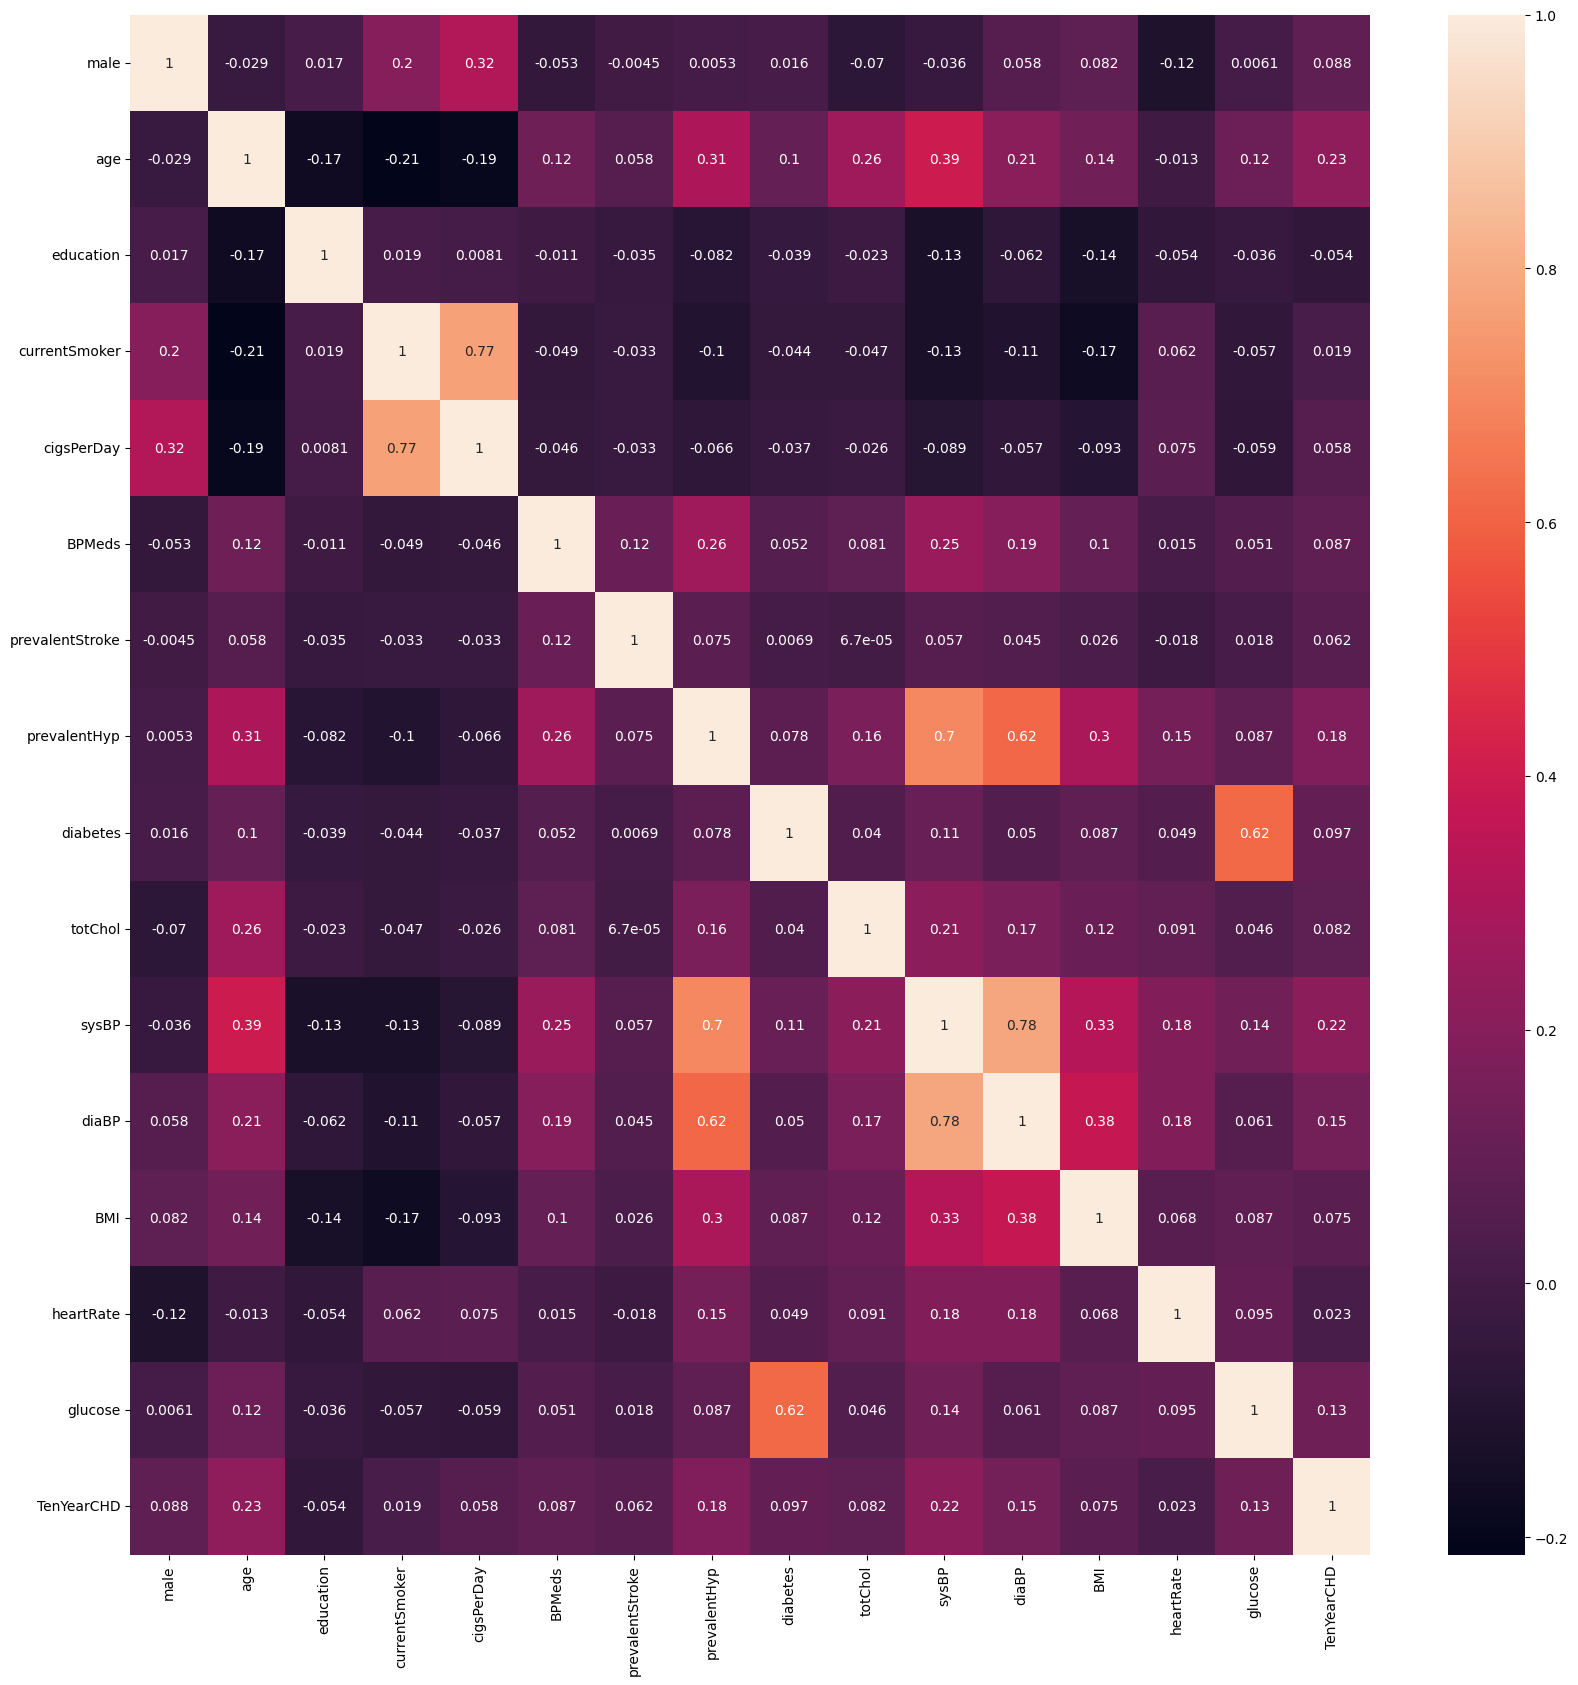

In [78]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data_logi.corr(),annot=True,ax=ax)

In [85]:
data_logi.dropna(inplace=True)

In [86]:
x=data_logi.drop("TenYearCHD",axis=1)
y=data_logi["TenYearCHD"]

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=43)

In [88]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(fit_intercept=True)

In [89]:
regressor.fit(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
y_pred_test=regressor.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2493
           1       0.63      0.04      0.07       432

    accuracy                           0.85      2925
   macro avg       0.74      0.52      0.50      2925
weighted avg       0.82      0.85      0.80      2925



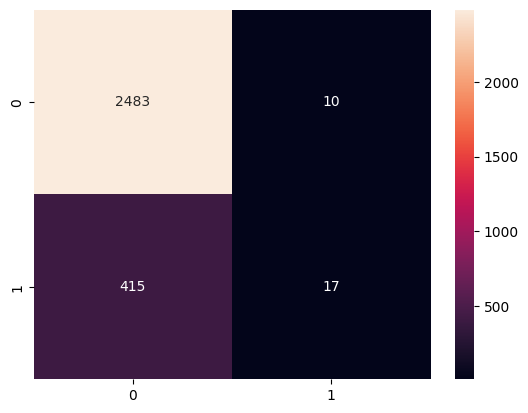

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
print(classification_report(y_test,y_pred_test))

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [105]:
model=LogisticRegression()
predict=cross_validate(model,x,y,cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [107]:
predict['test_score'].mean()

0.8517488581402823

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
data_c=pd.read_csv("credit_data.csv")

In [114]:
data_c.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [126]:
data_c.dropna(inplace=True)

In [127]:
x=data_c.drop(["clientid","default"],axis=1).values
y=data_c["default"].values

In [128]:
regressor=KNeighborsClassifier(n_neighbors=5)

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=43)

In [131]:
model=KNeighborsClassifier(n_neighbors=20)

In [132]:
fitted_model=model.fit(X_train,y_train)
prediction=fitted_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1370
           1       0.90      0.62      0.73       228

    accuracy                           0.94      1598
   macro avg       0.92      0.80      0.85      1598
weighted avg       0.93      0.94      0.93      1598



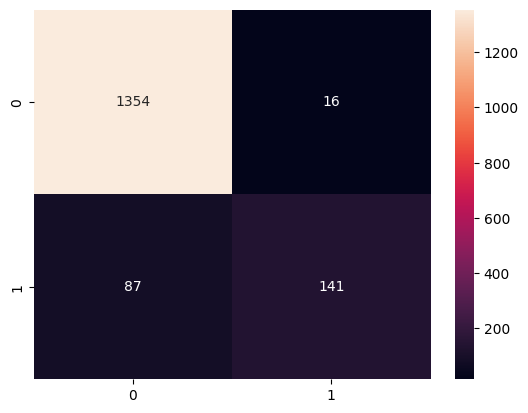

In [133]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt='d')
print(classification_report(y_test,prediction))

In [146]:
from sklearn.model_selection import cross_validate
cross_valid_scores=[]
for k in range(1,100):
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_validate(knn,x,y,cv=10,scoring="accuracy")
  cross_valid_scores.append(scores['test_score'].mean())

In [141]:
np.argmax(cross_valid_scores) #optimal k

22

In [142]:
confusion_matrix(y_test,prediction)

array([[1354,   16],
       [  87,  141]])